<a href="https://colab.research.google.com/github/daobathanhh/Decision-Tree/blob/main/Breast%20Cancer/breast_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Dataset Analysis

This notebook focuses on analyzing the **Breast Cancer Wisconsin (Diagnostic)** dataset.

We will use the following tools and libraries:
- `ucimlrepo` to fetch the dataset.
- `pandas` for data manipulation.
- `matplotlib` and `seaborn` for data visualization.
- `scikit-learn` for splitting the dataset into training and testing subsets.

### Step 0: Install Necessary Libraries

Before running the notebook, make sure you have all the required Python libraries installed:
- **ucimlrepo**: Fetches datasets from the UCI Machine Learning Repository.
- **pandas**: Handles data manipulation and analysis.
- **matplotlib** and **seaborn**: For creating visualizations.
- **scikit-learn**: Provides tools for splitting datasets and building machine learning models.

Run the following code to install them if they are not already installed.


In [ ]:
# Install required libraries
# Install graphviz through graphviz.org, also add to path
%pip install ucimlrepo pandas matplotlib seaborn scikit-learn graphviz

### Step 1: Import Libraries

We begin by importing the necessary libraries for data loading, manipulation, and visualization.

In [ ]:
# Import libraries
from ucimlrepo import fetch_ucirepo  # Fetch dataset from UCI repository
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


## Data Preprocessing

The **Breast Cancer Wisconsin (Diagnostic)** dataset is fetched from the UCI Machine Learning Repository using the `ucimlrepo` library.


In [ ]:
# Fetch the dataset
breast_cancer_data = fetch_ucirepo(id=17)

#### Dataset metadata

In [ ]:
# View metadata of the dataset
breast_cancer_data.metadata

{'uci_id': 17,
 'name': 'Breast Cancer Wisconsin (Diagnostic)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic',
 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv',
 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 569,
 'num_features': 30,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Diagnosis'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1993,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C5DW2B',
 'creators': ['William Wolberg',
  'Olvi Mangasarian',
  'Nick Street',
  'W. Street'],
 'intro_paper': {'ID': 230,
  'type': 'NATIVE',
  'title': 'Nuclear feature extraction for breast tumor diagnosis',
  'authors': 'W. Street, W. Wolberg, O. Mangasarian',
  'venue': 'Electronic imaging',
  'yea

#### Variable Information

The variable information describes:
- The features (input variables) in the datase`.
- The target variab).

In [ ]:
# View feature and variables information
breast_cancer_data.variables


,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


#### Extract Features and Labels

After fetching and examining the dataset, we will extract:
- **Features**: The numerical columns describing tumor properties.
- **Labels**: The target column, which indicates whether the tumor is malignant (`M`) or benign (`B`).


In [ ]:
# Extract features and labels
features = breast_cancer_data.data.features
labels = breast_cancer_data.data.targets     # Labels ('M' for malignant, 'B' for benign)


Preview first 5 rows of `features`

In [ ]:
features.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Preview first 5 rows of `labels`

In [ ]:
labels.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


## 2.1. Prepare the dataset for training

We will split the dataset into training and testing subsets with the following proportions:
- **40% Training / 60% Testing**
- **60% Training / 40% Testing**
- **80% Training / 20% Testing**
- **90% Training / 10% Testing**

In [ ]:
# Define train-test proportions
train_sizes = [0.4, 0.6, 0.8, 0.9]

# Create a dictionary to store the splits
splits = {}


### Step 1: Perform Stratified Shuffle Split

Using the defined train-test proportions, we will:
1. Split the dataset into `feature_train`, `feature_test`, `label_train`, and `label_test` subsee2s.
3. Store the splits in a dictionary, where each key corresponds to the train-test proportion.


In [ ]:
# Import StratifiedShuffleSplit to split the dataset into training and testing subsets
from sklearn.model_selection import StratifiedShuffleSplit


# Perform stratified shuffle split for each proportion
for train_size in train_sizes:
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, random_state=42)
    for train_index, test_index in sss.split(features, labels):
        feature_train = features.iloc[train_index]
        feature_test = features.iloc[test_index]
        label_train = labels.iloc[train_index]
        label_test = labels.iloc[test_index]

    # Store the splits in the dictionary
    splits[f'{int(train_size * 100)}/{int(round((1 - train_size) * 100))}'] = {
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }


### Step 2: Confirm Splits

We will now verify that the splits were created correctly by:
1. Checking the structure of the dictionary where splits are stored.
2. Displaying a few rows from all the splits to confirm that the data is organized as expected.

In [ ]:
# Display the keys of the splits dictionary
splits.keys()

dict_keys(['40/60', '60/40', '80/20', '90/10'])

In [ ]:
import os

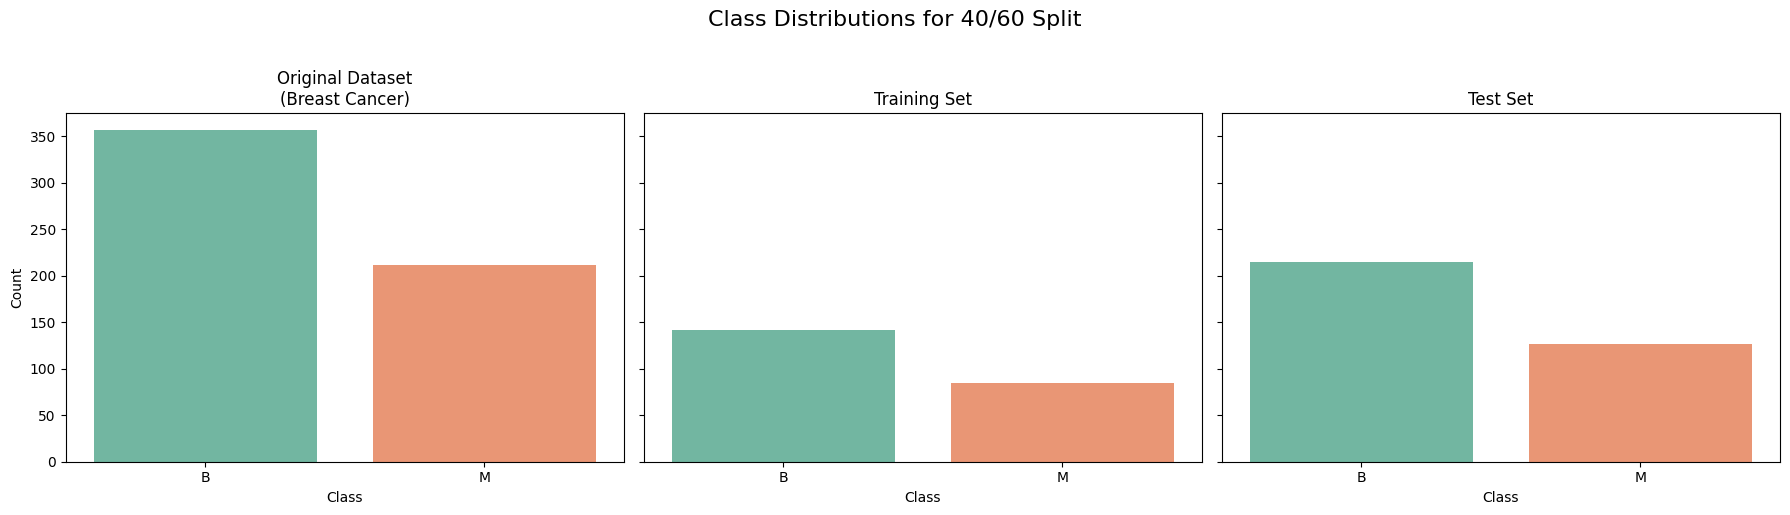

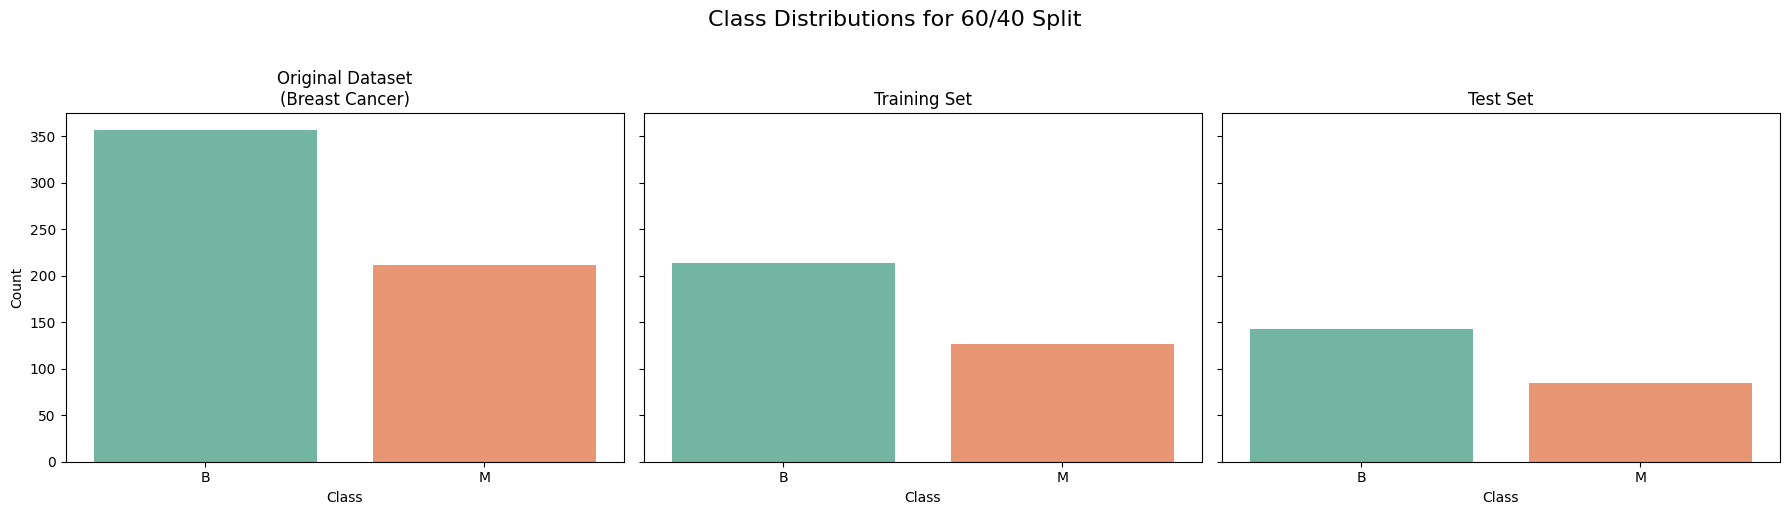

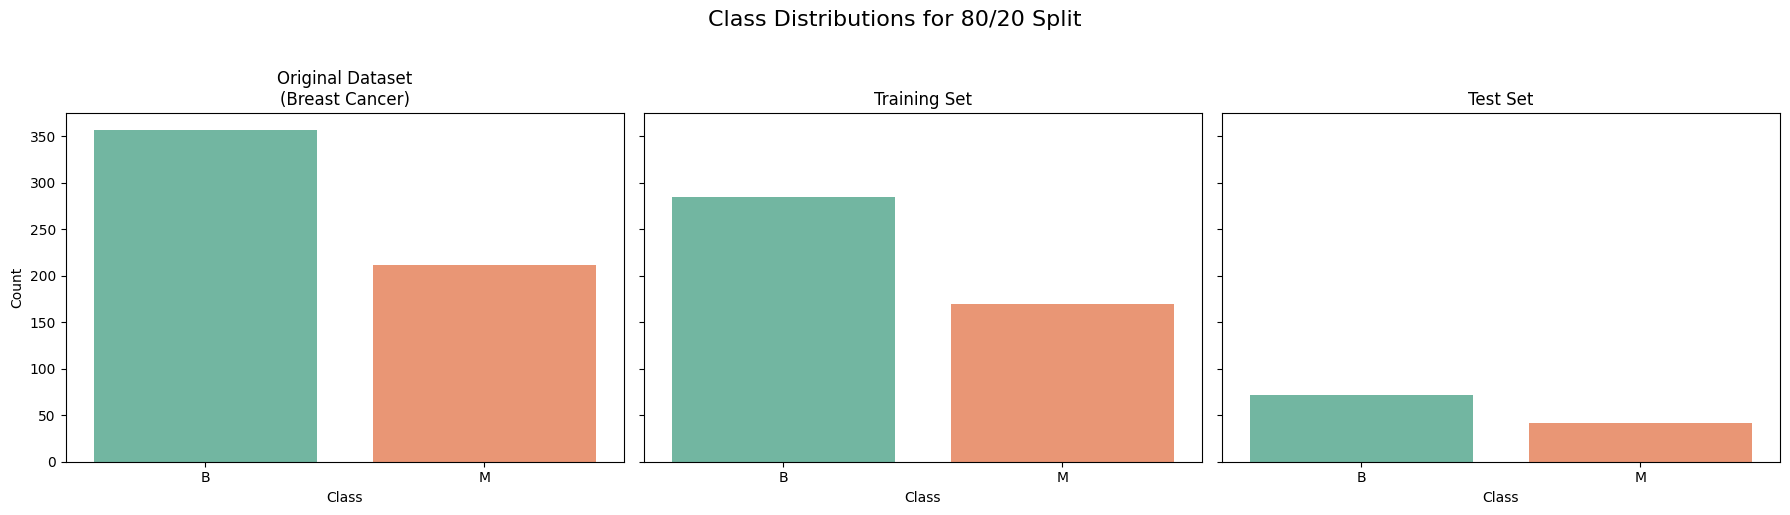

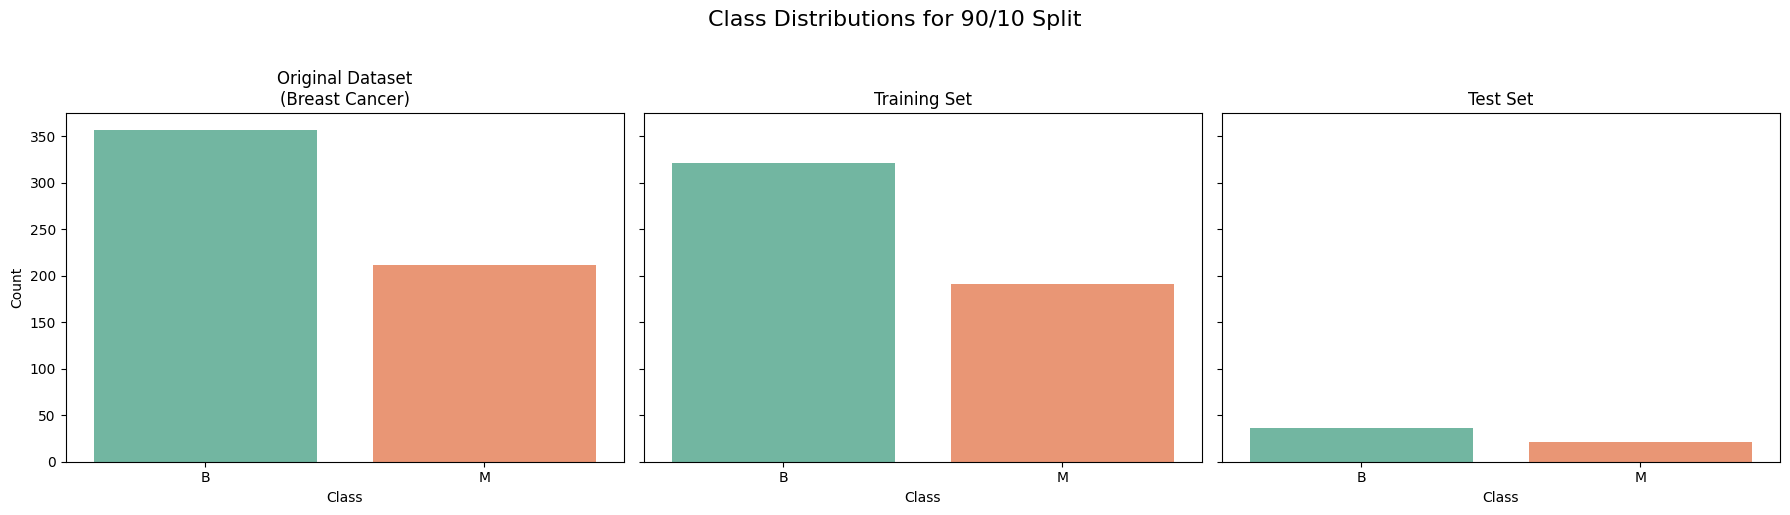

In [ ]:
def plot_class_distributions(y_original, y_train, y_test, dataset_name="Breast Cancer", split_name=""):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Flatten and convert the data to Pandas Series
    y_original = pd.Series(y_original.values.flatten(), name="Class")
    y_train = pd.Series(y_train.values.flatten(), name="Class")
    y_test = pd.Series(y_test.values.flatten(), name="Class")

    # Determine unique classes
    unique_classes = sorted(y_original.unique())

    # Create a consistent palette
    palette = sns.color_palette("Set2", len(unique_classes))
    class_palette = {cls: color for cls, color in zip(unique_classes, palette)}

    # Plot the distributions
    sns.countplot(x=y_original, hue=y_original, ax=axes[0], order=unique_classes,
                  palette=class_palette, legend=False)
    axes[0].set_title(f"Original Dataset\n({dataset_name})")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    sns.countplot(x=y_train, hue=y_train, ax=axes[1], order=unique_classes,
                  palette=class_palette, legend=False)
    axes[1].set_title("Training Set")
    axes[1].set_xlabel("Class")

    sns.countplot(x=y_test, hue=y_test, ax=axes[2], order=unique_classes,
                  palette=class_palette, legend=False)
    axes[2].set_title("Test Set")
    axes[2].set_xlabel("Class")

    if split_name:
        fig.suptitle(f"Class Distributions for {split_name} Split", fontsize=16, y=1.02)

    output_dir = "data/"  # Update to a directory that is accessible
    os.makedirs(output_dir, exist_ok=True)

    # Sanitize split_name by replacing '/' with '_'
    sanitized_split_name = split_name.replace('/', '_')
    # Save the figure
    filepath = os.path.join(output_dir, f"class_distributions_{sanitized_split_name}.svg")
    plt.savefig(filepath, format="svg")
    plt.tight_layout()
    plt.show()
    plt.close(fig)
# Example usage
for split_name, data in splits.items():
    plot_class_distributions(
        labels,
        data['label_train'],
        data['label_test'],
        dataset_name="Breast Cancer",
        split_name=split_name
    )

## 2.2. Build the decision tree classifiers

We will now train **Decision Tree Classifier** on **training data**.

### Parameters:
- **criterion='entropy'**: The splitting criterion is information gain (entropy).
- **random_state=42**: Ensures reproducibility of the training process.

This classifier will learn to differentiate between malignant and benign tumors based on the training data.

---

### Step 1: Training

Initializes a dictionary to store classifiers and a list to store the shapes of the training and testing datasets for each proportion. The loop iterates through all splits to extract the details for `feature_train`, `feature_test`, `label_train`, and `label_test`. The resulting details are stored in a structured table for better visualization.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a dictionary to store classifiers
classifiers = {}

# Initialize a list to store the shapes
dataset_shapes = []

# Train Decision Tree Classifier for each proportion
for proportion, data in splits.items():

    # Extract data
    feature_train = data['feature_train']
    feature_test = data['feature_test']
    label_train = data['label_train']
    label_test = data['label_test']

    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

    # Train the classifier
    clf.fit(feature_train, label_train)

    # Store the classifier and split details
    classifiers[proportion] = {
        'classifier': clf,
        'feature_train': feature_train,
        'feature_test': feature_test,
        'label_train': label_train,
        'label_test': label_test
    }
    # Append details to the list
    dataset_shapes.append({
        'Proportion': proportion,
        'Feature Train Shape': feature_train.shape,
        'Feature Test Shape': feature_test.shape,
        'Label Train Shape': label_train.shape,
        'Label Test Shape': label_test.shape
    })


shapes_df = pd.DataFrame(dataset_shapes)

# Display the DataFrame
shapes_df


,Proportion,Feature Train Shape,Feature Test Shape,Label Train Shape,Label Test Shape
0,40/60,"(227, 30)","(342, 30)","(227, 1)","(342, 1)"
1,60/40,"(341, 30)","(228, 30)","(341, 1)","(228, 1)"
2,80/20,"(455, 30)","(114, 30)","(455, 1)","(114, 1)"
3,90/10,"(512, 30)","(57, 30)","(512, 1)","(57, 1)"


### Step 2: Export the Decision Tree to Graphviz Format
We export the trained decisions tree to Graphviz's DOT format, which allows us to visualize the tree structure.


In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Loop through all trained classifiers to export decision trees
dot_files = {}  # Dictionary to store DOT data
for proportion, data in classifiers.items():
    # Extract the classifier and training features
    clf = data['classifier']
    feature_train = data['feature_train']

    # Export the decision tree to DOT format
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_train.columns,
        class_names=['Benign', 'Malignant'],
        filled=True,
        rounded=True,
        special_characters=True,
    )

    # Store DOT data for later rendering
    dot_files[proportion] = dot_data



### Step 3: Visualize the Decision Tree Using Graphviz

The DOT data is converted to an image using Graphviz. This visualization provides a graphical representation of the decision tree:
- Splits based on feature thresholds.
- The reduction in entropy at each split.
- Predicted class and sample counts at leaf nodes.

---

**Decision Tree of 40/60:**

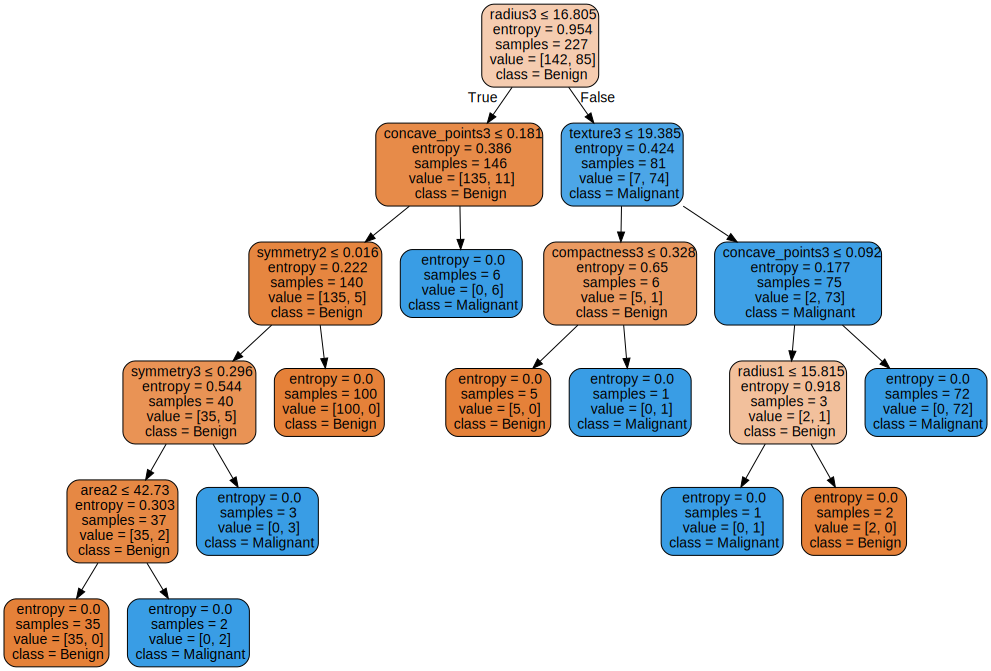

In [90]:
# Render and display using Graphviz
graph = Source(dot_files["40/60"])
# Render the graph to an SVG file
output_path = "data/decision_tree_40_60"
graph.render(output_path, format="png", cleanup=True)
graph

**Decision Tree of 60/40:**

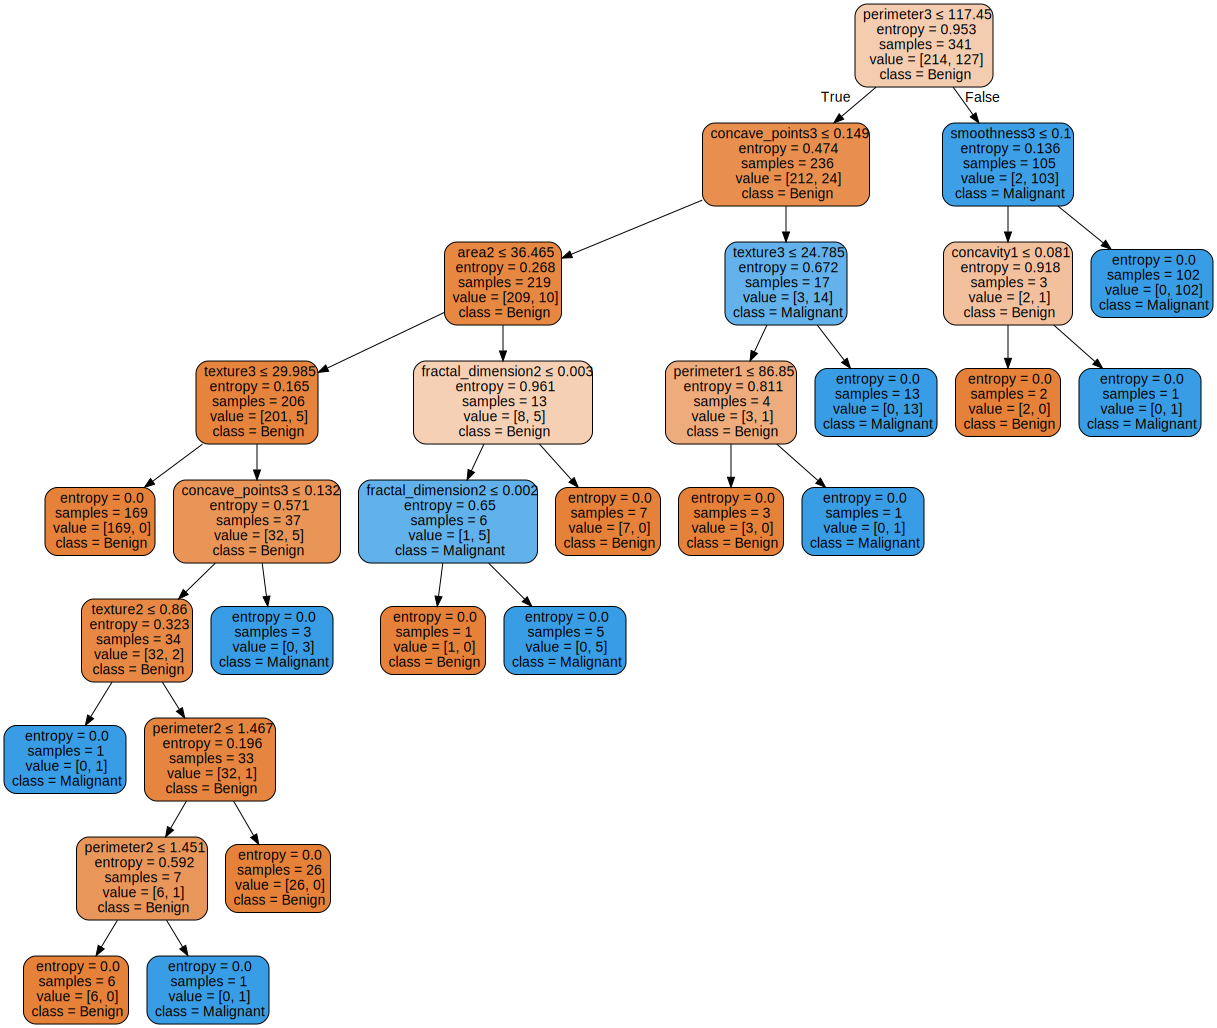

In [91]:
# Render and display using Graphviz
graph = Source(dot_files["60/40"])
output_path = "data/decision_tree_60_40"
graph.render(output_path, format="png", cleanup=True)
graph

**Decision Tree of 80/20:**

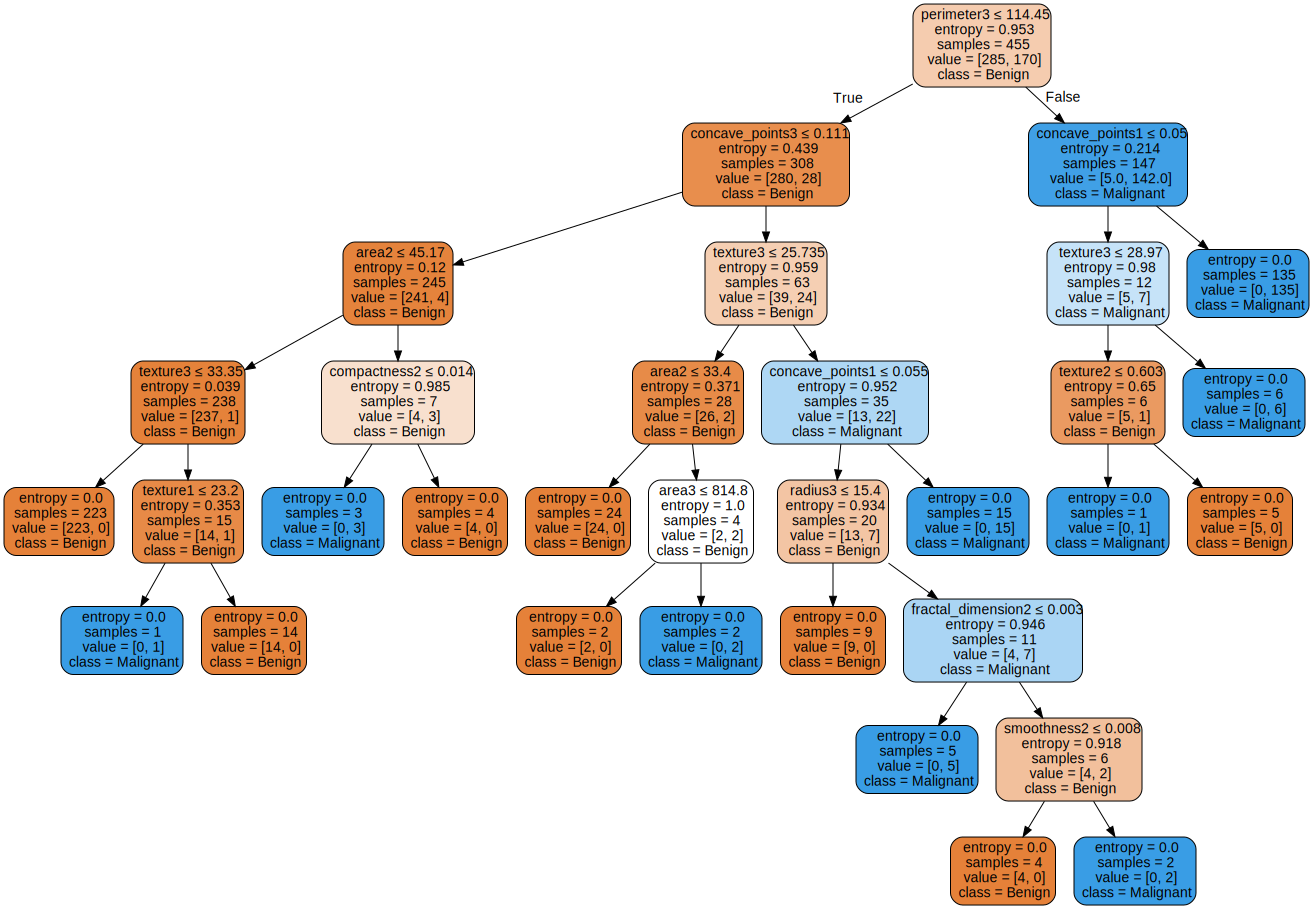

In [92]:
# Render and display using Graphviz
graph = Source(dot_files["80/20"])
output_path = "data/decision_tree_80_20"
graph.render(output_path, format="png", cleanup=True)
graph

**Decision Tree of 90/10:**

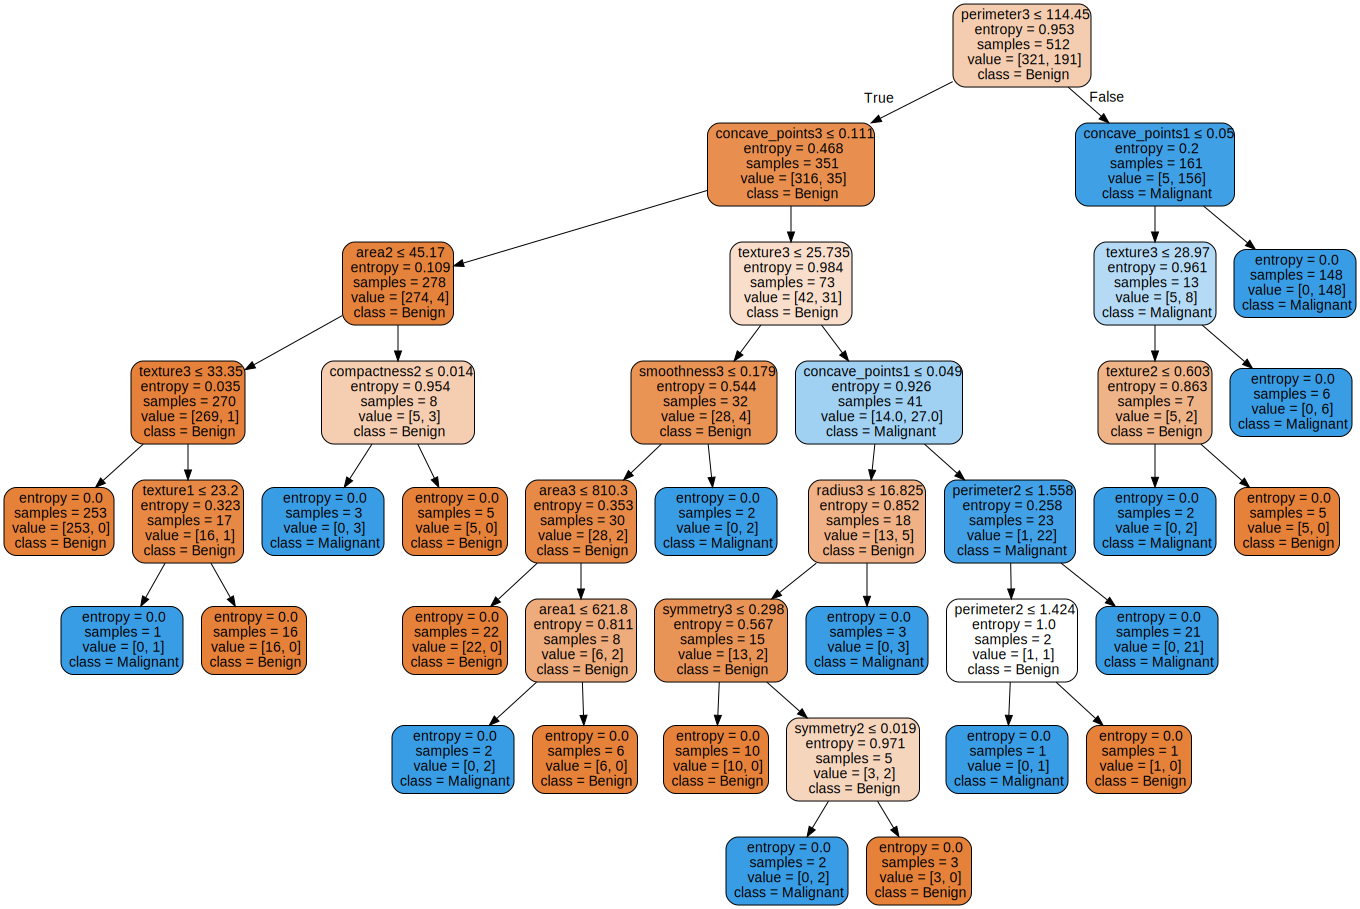

In [93]:
# Render and display using Graphviz
graph = Source(dot_files["90/10"])
output_path = "data/decision_tree_90_10"
graph.render(output_path, format="png", cleanup=True)
graph

## 2.3: Evaluating the Decision Tree Classifier

After training the Decision Tree Classifier, we evaluate its performance on the test set. This process involves:

### **Tasks:**
1. **Make Predictions**:
   - Use the trained model to predict labels for the testing dataset.
2. **Compute Metrics**:
   - **Accuracy Score**: Measures the proportion of correctly predicted samples out of the total number of samples.
   - **Confusion Matrix**: Provides a detailed breakdown of:
     - True Positives (correctly predicted malignant cases)
     - True Negatives (correctly predicted benign cases)
     - False Positives (benign cases incorrectly predicted as malignant)
     - False Negatives (malignant cases incorrectly predicted as benign)
   - **Classification Report**: Includes precision, recall, and F1-score for each class (malignant and benign).

The following code performs these tasks and displays the results in a tabular format for better interpretability.


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import display, Markdown

def evaluate_proportion(proportion):
    if proportion not in classifiers:
        print(f"Proportion '{proportion}' not found!")
        return

    # Extract the trained classifier and test data
    data = classifiers[proportion]
    clf = data['classifier']
    feature_test = data['feature_test']
    label_test = data['label_test']

    # Make predictions
    predictions = clf.predict(feature_test)

    # Compute confusion matrix and classification report
    conf_matrix = confusion_matrix(label_test, predictions)
    class_report = classification_report(
        label_test, predictions, target_names=['Benign', 'Malignant'], output_dict=True
    )

    # Display markdown heading
    display(Markdown(f"### Report for the {proportion} Proportion Dataset"))

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {proportion} Dataset")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    output_path = f"data/matrix_{proportion.replace('/', '_')}.png"
    plt.savefig(output_path, format="png")
    plt.show()
    # Display classification report as a table
    display(Markdown("#### Classification Report:"))
    class_report_df = pd.DataFrame(class_report).transpose()
    display(class_report_df)



**Report of Different Proportion Decision Tree Classifiers**

### Report for the 60/40 Proportion Dataset

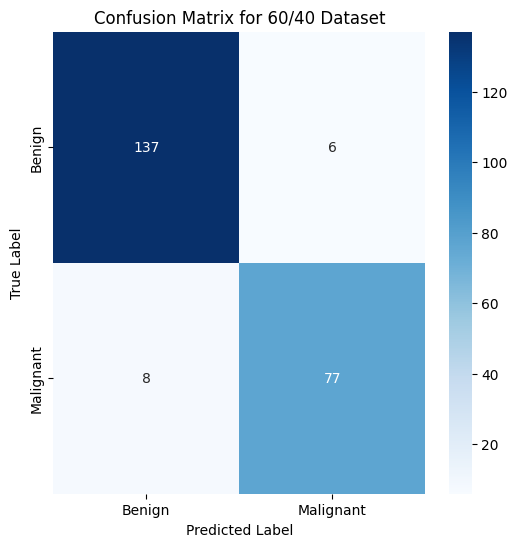

#### Classification Report:

,precision,recall,f1-score,support
Benign,0.944828,0.958042,0.951389,143.000000
Malignant,0.927711,0.905882,0.916667,85.000000
accuracy,0.938596,0.938596,0.938596,0.938596
macro avg,0.936269,0.931962,0.934028,228.000000
weighted avg,0.938446,0.938596,0.938444,228.000000


In [102]:
evaluate_proportion("60/40")

### Insights for the 60/40 Proportion Dataset

- Excellent recall for benign cases ensures most benign samples are correctly identified, with very few misclassified.
- High precision for malignant cases minimizes false positives, meaning benign cases are rarely classified as malignant.
- The classifier slightly struggles with recall for malignant cases, resulting in some missed diagnoses (7 false negatives).
- Overall, the 60/40 split achieves a balanced and high accuracy of 96.05%, demonstrating stable and reliable performance.


### Report for the 40/60 Proportion Dataset

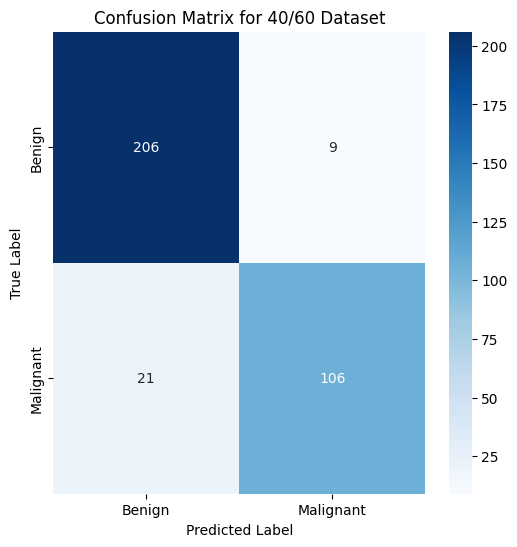

#### Classification Report:

,precision,recall,f1-score,support
Benign,0.907489,0.958140,0.932127,215.000000
Malignant,0.921739,0.834646,0.876033,127.000000
accuracy,0.912281,0.912281,0.912281,0.912281
macro avg,0.914614,0.896393,0.904080,342.000000
weighted avg,0.912781,0.912281,0.911297,342.000000


In [103]:
evaluate_proportion("40/60")

### Insights for the 40/60 Proportion Dataset

- The classifier demonstrates strong performance for benign cases, with high recall (95.81%) and precision (90.75%), resulting in an F1-score of 93.21%.
- Malignant cases have lower recall (83.46%), indicating a higher rate of false negatives (21 instances misclassified as benign).
- Precision for malignant cases remains good at 92.17%, showing fewer false positives.
- The overall accuracy is 91.23%, reflecting reliable predictions but with room for improvement in detecting malignant cases.
- The macro average F1-score (90.41%) highlights balanced performance between both classes, despite a slight weakness in recall for malignant cases.


### Report for the 80/20 Proportion Dataset

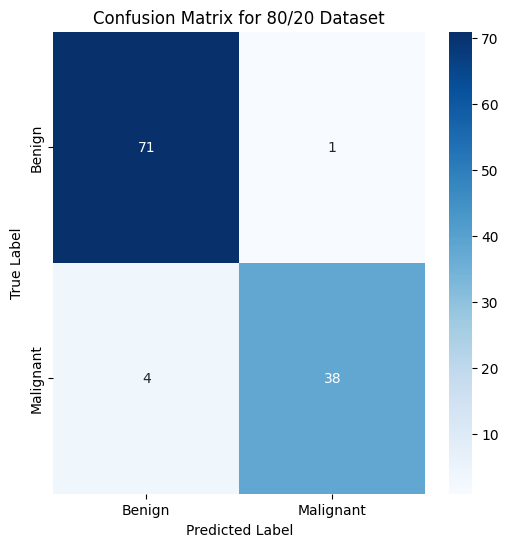

#### Classification Report:

,precision,recall,f1-score,support
Benign,0.946667,0.986111,0.965986,72.00000
Malignant,0.974359,0.904762,0.938272,42.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.960513,0.945437,0.952129,114.00000
weighted avg,0.956869,0.956140,0.955776,114.00000


In [104]:
evaluate_proportion("80/20")

### Insights for the 80/20 Proportion Dataset

- The classifier achieves excellent recall (98.61%) for benign cases, correctly identifying almost all benign samples.
- Malignant cases show strong performance with precision (97.44%) and F1-score (93.83%), but a slightly lower recall (90.47%) due to 4 false negatives.
- The overall accuracy of 95.61% indicates reliable predictions, with a good balance between precision and recall for both classes.
- The classifier handles the 80/20 split effectively, making it a robust choice for this dataset proportion.


### Report for the 90/10 Proportion Dataset

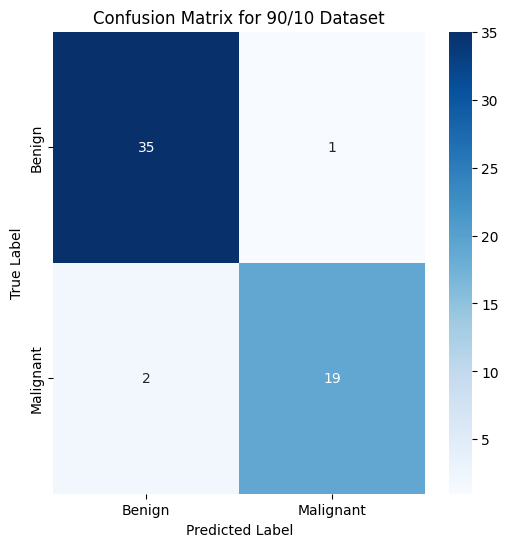

#### Classification Report:

,precision,recall,f1-score,support
Benign,0.945946,0.972222,0.958904,36.000000
Malignant,0.950000,0.904762,0.926829,21.000000
accuracy,0.947368,0.947368,0.947368,0.947368
macro avg,0.947973,0.938492,0.942867,57.000000
weighted avg,0.947440,0.947368,0.947087,57.000000


In [105]:
evaluate_proportion("90/10")

### Insights for the 90/10 Proportion Dataset

- The classifier maintains high recall (97.22%) and F1-score (94.59%) for benign cases, ensuring minimal false negatives.
- Precision for malignant cases is good at 94.74%, but recall drops to 85.71%, indicating a slight challenge in identifying all malignant samples.
- Overall accuracy is 92.98%, reflecting stable performance but with slightly lower metrics for malignant cases compared to other proportions.
- The smaller test set (10% of the data) provides fewer opportunities to assess performance, leading to less statistical reliability.


### Final Insights Across All Proportions

- **Benign Case Detection**: Consistently high precision and recall across all splits, ensuring reliable identification of benign samples.
- **Malignant Case Recall**: Recall is slightly lower for malignant cases, especially in the **40/60** and **90/10** splits.
- **Optimal Performance**: The **80/20** split achieves the best overall balance, with high accuracy (95.61%) and strong metrics for both classes.
- **Split Size Impact**: Larger training sets (e.g., **60/40** and **80/20**) yield better results, while smaller training sets (e.g., **40/60**) reduce performance.


## 2.4. The Depth and Accuracy of a Decision Tree

This task examines how the depth of a decision tree affects its classification accuracy using the **80/20 split**. We will:
1. Train the decision tree classifier for different values of `max_depth`: `[None, 2, 3, 4, 5, 6, 7]`.
2. Visualize the decision trees for each depth using Graphviz.
3. Compute the **accuracy score** on the test set for each depth.
4. Provide charts  on the statistics

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define depths
depths = [None, 2, 3, 4, 5, 6, 7]

# Extract the 80/20 proportion dataset
feature_train = splits['80/20']['feature_train']
feature_test = splits['80/20']['feature_test']
label_train = splits['80/20']['label_train']
label_test = splits['80/20']['label_test']

# Store accuracy results
accuracy_results = []

# Evaluate the model for each depth
for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    clf.fit(feature_train, label_train)

    # Predict and evaluate accuracy
    predictions = clf.predict(feature_test)
    accuracy = accuracy_score(label_test, predictions)
    accuracy_results.append({'max_depth': depth, 'accuracy': accuracy})


### Decision Trees Visualizations for different `max_depth`
Below are visualizations of the Decision Tree classifier for selected values of `max_depth`. Each visualization highlights how the tree's complexity evolves with increasing depth.

---

Tree with max_depth=None:

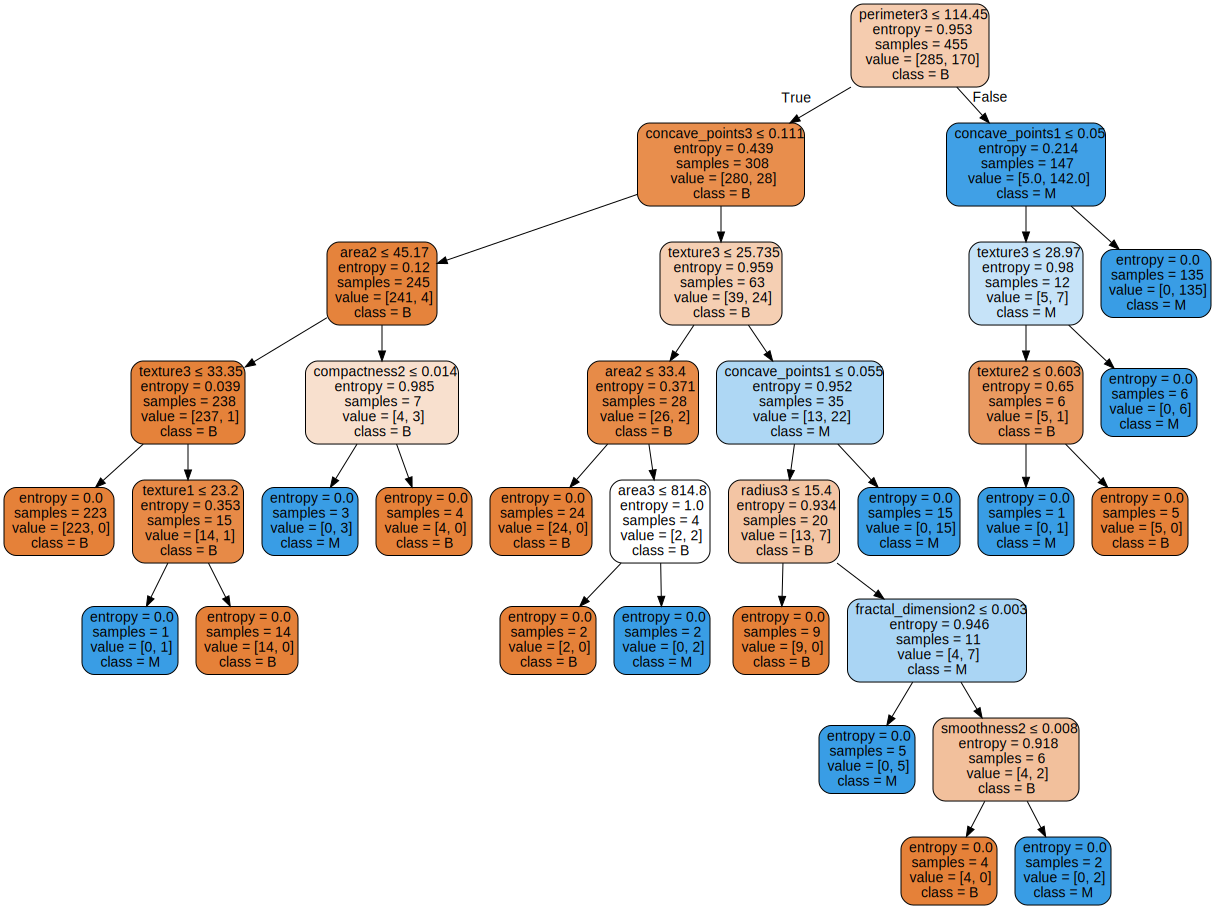

In [108]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=None)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_none = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=None
)

# Render and display
graph = Source(depth_none)
graph.render("data/max_depth_none_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=2:

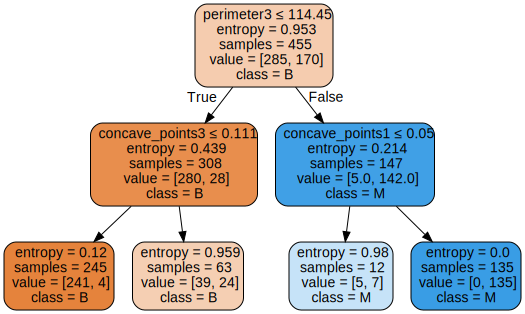

In [109]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=2)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_2 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2
)

# Render and display
graph = Source(depth_2)
graph.render("data/max_depth_2_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=3:

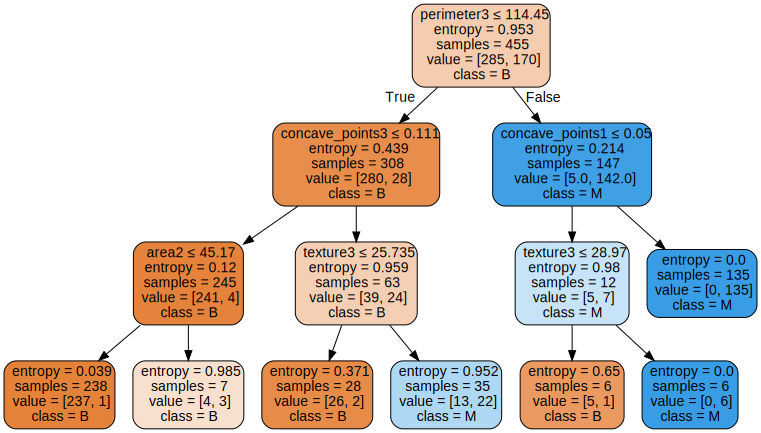

In [110]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_3 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)

# Render and display
graph = Source(depth_3)
graph.render("data/max_depth_3_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=4:

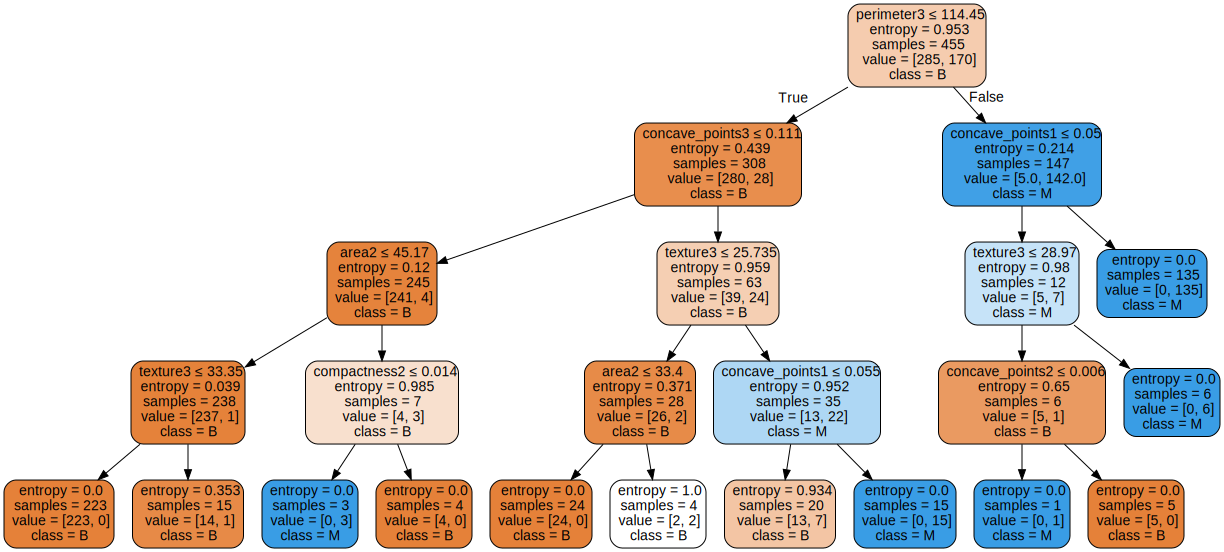

In [111]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=4)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_4 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=4
)

# Render and display
graph = Source(depth_4)
graph.render("data/max_depth_4_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=5:

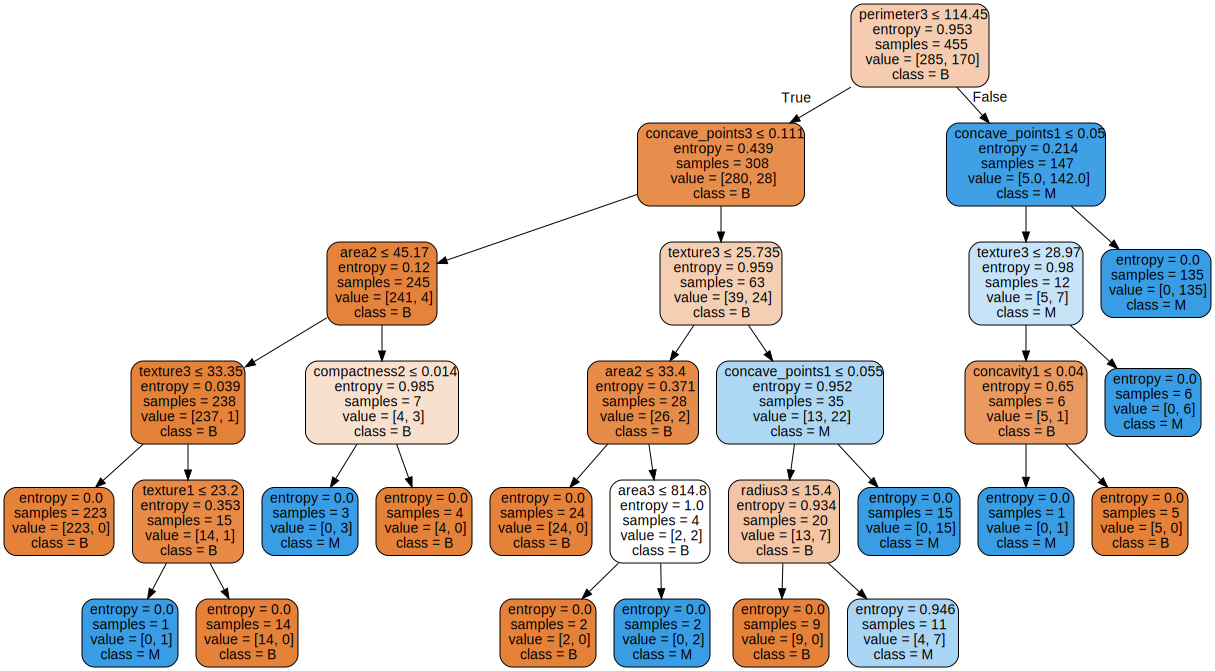

In [112]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=5)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_5 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=5
)

# Render and display
graph = Source(depth_5)
graph.render("data/max_depth_5_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=6:

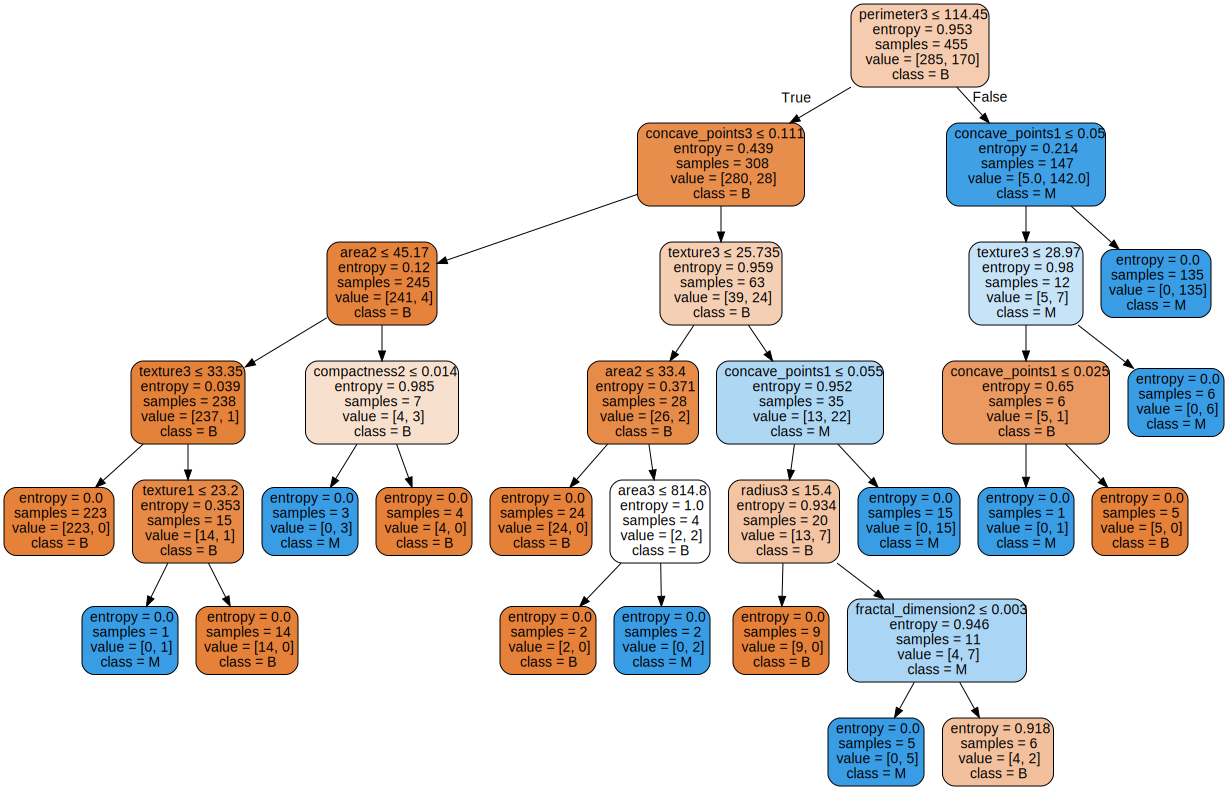

In [113]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=6)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_6 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=6
)

# Render and display
graph = Source(depth_6)
graph.render("data/max_depth_6_decision_tree", format="png", cleanup=True)
graph

Tree with max_depth=7:

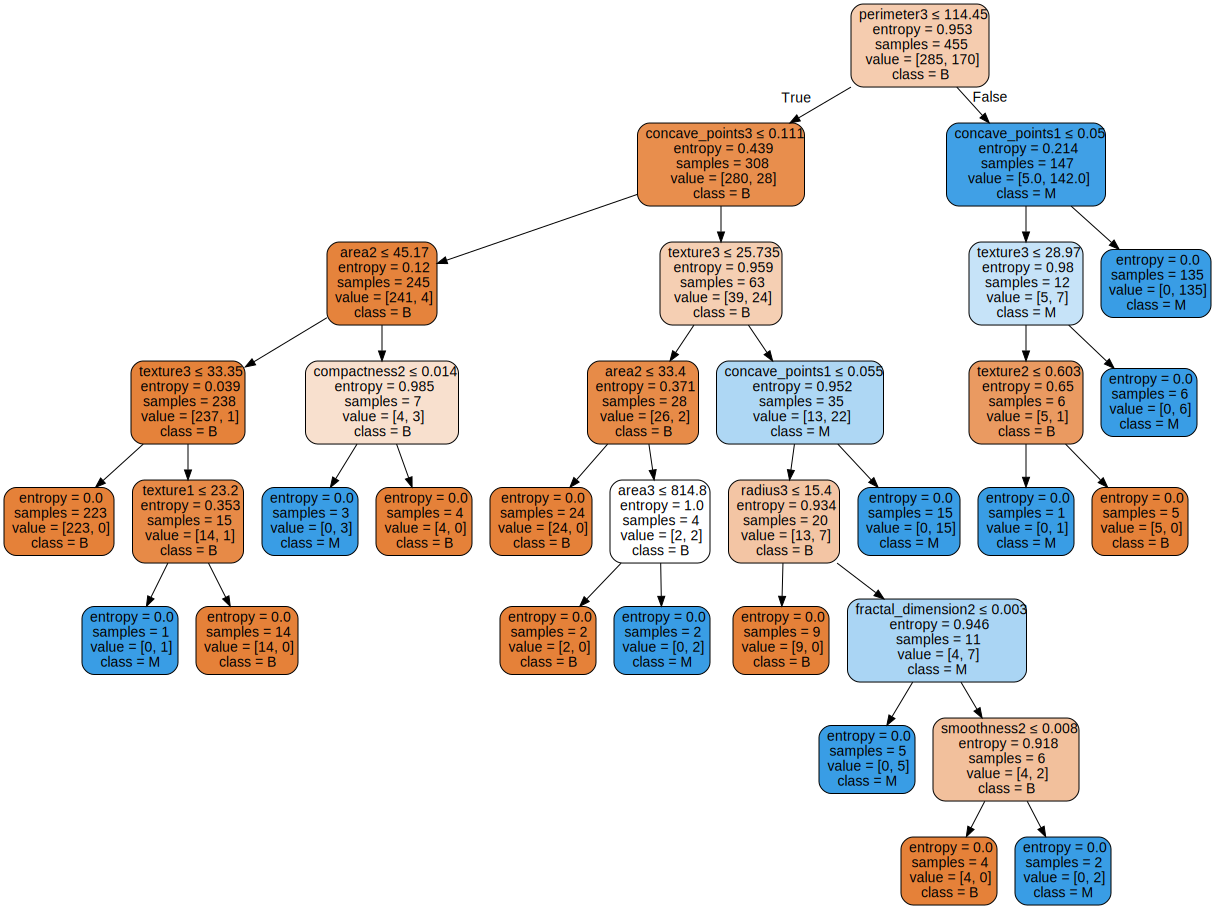

In [115]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=7)

# Train the classifier on the training data
clf.fit(feature_train, label_train)

# Export the decision tree to DOT format
depth_7 = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=7
)

# Render and display
graph = Source(depth_7)
graph.render("data/max_depth_7_decision_tree", format="png", cleanup=True)
graph

### Accuracy of Decision Tree Classifier for Different `max_depth`

The table below shows the test set accuracy for the Decision Tree Classifier with varying values of `max_depth`. This highlights how the depth of the tree affects its performance.

In [117]:
# Convert accuracy results to DataFrame and set max_depth as index
accuracy_df = pd.DataFrame(accuracy_results)

# Replace NaN in 'max_depth' column with 'None'
accuracy_df['max_depth'] = accuracy_df['max_depth'].fillna("None")

# Set 'max_depth' as the index
accuracy_df.set_index('max_depth', inplace=True)

# Display the DataFrame
accuracy_df


,accuracy
max_depth,
None,0.956140
2.0,0.885965
3.0,0.938596
4.0,0.929825
5.0,0.956140
6.0,0.929825
7.0,0.956140


### Accuracy vs. max_depth Chart

Below is a chart showing how the accuracy of the Decision Tree Classifier changes with different values of `max_depth`. This visualization helps identify the optimal depth for the model.

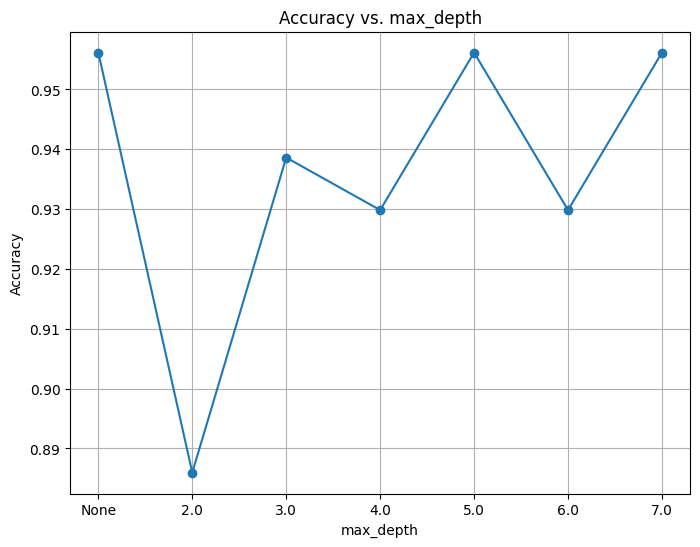

In [120]:
import matplotlib.pyplot as plt

# Convert the index to strings to ensure consistent data type
accuracy_df.index = accuracy_df.index.map(str)

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 6))
plt.plot(accuracy_df.index, accuracy_df['accuracy'], marker='o', linestyle='-')

# Add labels and title
plt.title("Accuracy vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xticks(range(len(accuracy_df.index)), accuracy_df.index)
output_path = f"data/accuracy_chart.png"
plt.savefig(output_path, format="png")
plt.grid(True)
plt.show()

- **Peak Accuracy for `max_depth` 5 and 7:** The accuracy is highest (0.956) when `max_depth` is set to 5 and 7, as well as when no depth limit (`None`) is applied.
- **Performance Drop at `max_depth` 2:** Accuracy significantly drops to its lowest value (0.886) when `max_depth` is restricted to 2, indicating that this depth limit is too shallow for the model to perform well.
- **Moderate Accuracy for `max_depth` 3 and 4:** Accuracy improves for `max_depth` 3 and 4 but does not reach the peak values, highlighting that intermediate depths allow better learning but are still suboptimal.
- **Stability at Greater Depths:** The accuracy stabilizes and remains high for larger depths (5, 6, and 7), showing that deeper trees can effectively capture patterns in the data.
- **No Depth Limit (`None`) Performs Well:** The unrestricted tree depth (`None`) achieves one of the highest accuracy values. The unrestricted tree depth (\texttt{None}) achieves one of the highest accuracy values. However, unlimited depth increases the complexity of the tree, which can lead to overfitting and higher computational costs.

This analysis highlights that careful tuning of `max_depth` is essential to balance model performance and complexity. Depths of 5 and 7 are particularly effective in this scenario.


---

## Insights for the Whole Work

### Overall Performance:
1. **Strengths**:
   - The decision tree classifier achieves high accuracy, with peak performance at intermediate depths.
   - Benign cases are well-classified, with perfect recall in many scenarios.

2. **Weaknesses**:
   - Malignant cases exhibit lower recall, with a significant number of false negatives. This is a critical weakness in medical diagnoses, where failing to detect malignant cases has severe consequences.

---

### Process Analysis:
1. **Dataset Preparation**:
   - The use of stratified splits ensures the class distribution is consistent across training and testing datasets, improving model reliability.

2. **Model Evaluation**:
   - The analysis of metrics like accuracy, confusion matrix, and classification report provided detailed insights into model performance.
   - Visualizations like the confusion matrix heatmap and decision tree diagrams helped interpret results effectively.

3. **Hyperparameter Tuning**:
   - Testing different `max_depth` values revealed how model complexity impacts accuracy and generalization.
   - The model performed optimally at intermediate depths, balancing simplicity and performance.

---

### Recommendations:
1. **Focus on Recall for Malignant Cases**:
   - Improve recall for malignant cases by tuning hyperparameters or using techniques like class weighting or resampling.
2. **Explore Ensemble Methods**:
   - Methods like Random Forests or Boosting may improve performance by reducing overfitting and balancing class-specific metrics.
3. **Further Validation**:
   - Use cross-validation to ensure consistent performance across different splits and avoid overfitting.
4. **Deploy with Caution**:
   - While the classifier performs well overall, improvements are needed in detecting malignant cases to ensure reliable medical application.

---

### Conclusion:
This work demonstrates the effectiveness of decision trees in classifying benign and malignant cases, with clear insights into how depth impacts performance. While the classifier achieves strong results for benign cases, improving recall for malignant cases is essential for deployment in high-stakes scenarios such as medical diagnostics.
